# Data Science: Sales Analysis on Real World Data

In this notebook I practiced pandas and seaborn by solving data science problems

I'll be doing some sales analysis on real world data

* First I will import some libraries
* Then I will combine all the csv files into a single pandas DataFrame
* Then I will be doing some data clean up
* Then I will create some additional columns that would allow me to solve the problems

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Task 1

**Combine all the csv files of each month sales into one DataFrame**

In [6]:
import os
files_list = os.listdir('Sales_Data/')
all_df = []
for f in files_list:
    all_df.append(pd.read_csv('Sales_Data/' + f))
    
all_month = pd.concat(all_df, axis=0)

# Task 2 Data Clean up

**Drop na values**

In [21]:
all_month.dropna(how='all', inplace=True)

**Remove rows where the header is repeated**

In [ ]:
all_month['Order Date'] = pd.to_datetime(all_month['Order Data'])

**Change type of Order Date from str to datetime**

In [38]:
all_month['Order Date']=pd.to_datetime(all_month['Order Date'])

## Augment data with additional columns

**Add month column**

In [54]:
all_month['month'] = all_month['Order Date'].apply(lambda x : x.month)

**Add Sales column**

In [62]:
all_month['Price Each'] = pd.to_numeric(all_month['Price Each'])
all_month['Quantity Ordered'] = pd.to_numeric(all_month['Quantity Ordered'])

C:\Users\junai\AppData\Local\Temp\ipykernel_1864\692678401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month['Price Each'] = pd.to_numeric(all_month['Price Each'])
C:\Users\junai\AppData\Local\Temp\ipykernel_1864\692678401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month['Quantity Ordered'] = pd.to_numeric(all_month['Quantity Ordered'])


In [63]:
all_month['sales'] = all_month['Price Each'] * all_month['Quantity Ordered']

C:\Users\junai\AppData\Local\Temp\ipykernel_1864\4145469244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month['sales'] = all_month['Price Each'] * all_month['Quantity Ordered']


**Add City column**

In [88]:
def get_city(address):
    city_name =  address.split(',')[1]
    state_code = address.split(',')[2].split()[0]
    return f'{city_name} ({state_code})'

In [90]:
all_month['city'] = all_month['Purchase Address'].apply(lambda x : get_city(x))


C:\Users\junai\AppData\Local\Temp\ipykernel_1864\2906420940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month['city'] = all_month['Purchase Address'].apply(lambda x : get_city(x))


**Add hour column**

In [119]:
all_month['hour'] = all_month['Order Date'].apply(lambda x : x.hour)

C:\Users\junai\AppData\Local\Temp\ipykernel_1864\3931158679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month['hour'] = all_month['Order Date'].apply(lambda x : x.hour)


## Question no 1: What was the best month for sales? how much money was earned?

In [71]:
sales_by_month = all_month.groupby('month').sum()['sales'].sort_values(ascending=False)
sales_by_month

month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: sales, dtype: float64

**Top month was december, around 4.6 million was earned**

## Plot the sales using seaborn

Text(0, 0.5, 'Sales in Millions')

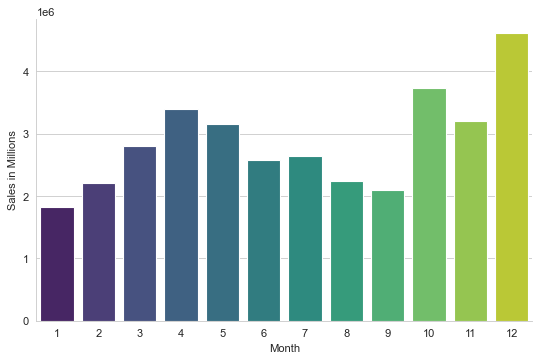

In [82]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_style('whitegrid')
sns.barplot(x='month', y='sales', data=sales_by_month.reset_index(), palette='viridis')
sns.despine()
plt.xlabel('Month')
plt.ylabel('Sales in Millions')

## What city made the highest sales?

In [97]:
sales_by_city = all_month.groupby('city').sum().reset_index()[['city', 'sales']]
sales_by_city.sort_values(by='sales', ascending=False)

,city,sales
8,San Francisco (CA),8262203.91
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
2,Boston (MA),3661642.01
0,Atlanta (GA),2795498.58
3,Dallas (TX),2767975.40
9,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
1,Austin (TX),1819581.75
6,Portland (ME),449758.27


### Create a bar plot for this data

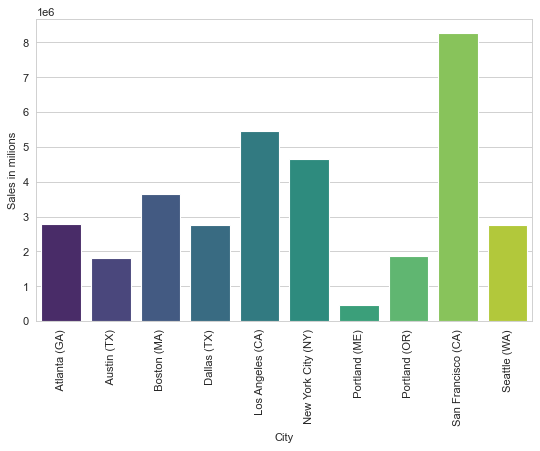

In [105]:
plt.figure(figsize=(8,5), dpi=80)
sns.barplot(x='city', y='sales', data=sales_by_city, palette='viridis')
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales in milions')
plt.show()

**San Francisco (CA) had the highest sales**

## What city had the highest number of sales?

In [189]:
num_sales_by_city = all_month.drop_duplicates('Order ID').groupby('city').count().reset_index()[['city', 'sales']]
num_sales_by_city.sort_values(by='sales', ascending=False)

,city,sales
8,San Francisco (CA),42898
4,Los Angeles (CA),28498
5,New York City (NY),23848
2,Boston (MA),19092
0,Atlanta (GA),14253
3,Dallas (TX),14240
9,Seattle (WA),14119
7,Portland (OR),9617
1,Austin (TX),9509
6,Portland (ME),2363


**San Francisco (CA) had the highest number of sales which is about 44 thousands**

## Create a bar plot for this data

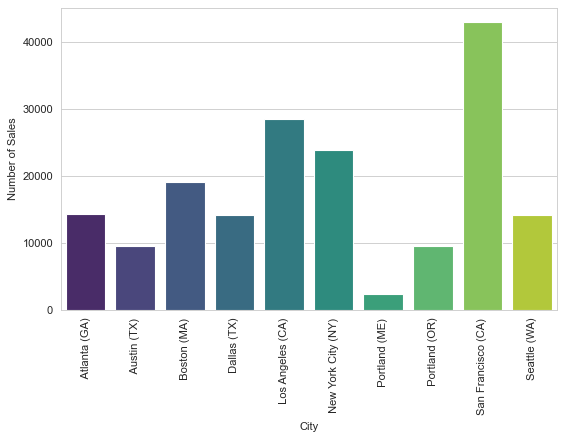

In [190]:
plt.figure(figsize=(8,5), dpi=80)
sns.barplot(x='city', y='sales', data=num_sales_by_city, palette='viridis')
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Number of Sales')
plt.show()

### Question 3 What time should we display advertisements to maximize the likelihood of customer's buying the product

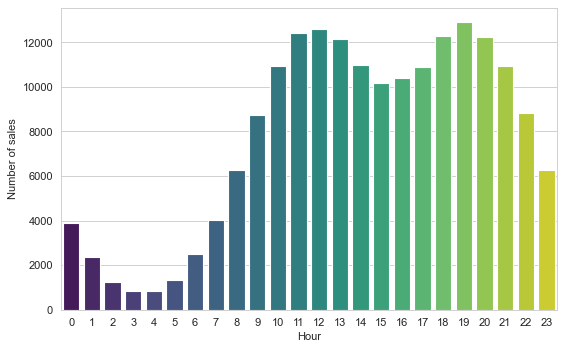

In [128]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(x='hour', data=all_month, palette='viridis')
plt.ylabel('Number of sales')
plt.xlabel('Hour')
plt.show()

**Most of the orders are placed between 11 am and 8 pm, therefore it is a better idea to show ads during this time**

## Now plot the same graph but for each city

In [147]:
sales_by_hour_city = all_month.groupby(['city', 'hour']).count().reset_index()[['city', 'hour', 'sales']]

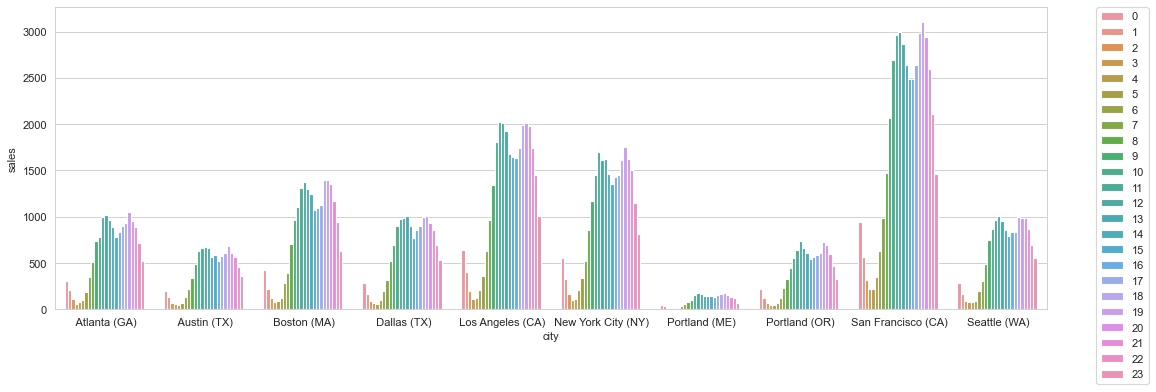

In [148]:
plt.figure(figsize=(16,5), dpi=80)
sns.barplot(x='city',y='sales', hue='hour', data=sales_by_hour_city)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**The buying pattern for all city looks somewhat similar**

## Question 4 What products are sold the most?

In [184]:
# Top 7 sold products
products_df = all_month.groupby('Product').sum().reset_index()[['Product', 'Quantity Ordered']]
products_df.sort_values(by='Quantity Ordered', ascending=False).head(7)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457


## Plot the number of products sold

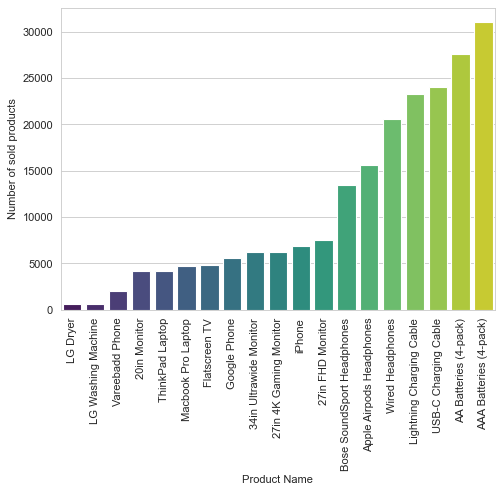

In [185]:
plt.figure(figsize=(7,5), dpi=80)
sns.barplot(x='Product', y='Quantity Ordered', data=products_df, order=products_df.sort_values(by='Quantity Ordered')['Product'], palette='viridis')
plt.xticks(rotation='vertical')
plt.ylabel('Number of sold products')
plt.xlabel('Product Name')
plt.show()